In [ ]:
import os
import cv2
import matplotlib.pyplot as plt 

### Resize Image 

In [ ]:
import os
import cv2

def resize_image_save_to_dir(folder_path, new_dir):
    
    if not os.path.exists(folder_path):
        os.makedirs(new_dir)
        print(f'Directory: {new_dir} created')
    else:
        print(f'Directory: {new_dir} already exists')

    for cur_dir, sub_dirs, files in os.walk(folder_path):
        for directory in sub_dirs:
            sub_directory = os.path.join(new_dir, directory)
            if not os.path.exists(sub_directory):
                os.makedirs(sub_directory)
                print(f'Subfolder {sub_directory} created')
            else:
                print(f'Subfolder {sub_directory} already exists')

            image_files = [f for f in os.listdir(os.path.join(cur_dir, directory)) if f.endswith(('.png', '.jpg', '.jpeg'))]

            for image_file in image_files:
                image_desti = os.path.join(cur_dir, directory, image_file)
                img = cv2.imread(image_desti)

                if img is not None:
                    resized_image = cv2.resize(img, (266, 266))
                    cv2.imwrite(os.path.join(sub_directory, image_file), resized_image)
                    print(f'Resized Image saved: {os.path.join(directory, image_file)}')
                else:
                    print(f'Failed to load image: {os.path.join(directory, image_file)}')

In [ ]:
# Example usage
folder_path = 'QuizDataset'
new_dir = 'Resize Images'
resize_image_save_to_dir(folder_path, new_dir)

### Load Resize Image

In [15]:
def load_images_from_directory(directory):
    images = []
    labels = []

    for cur_dir, sub_dirs, files in os.walk(directory):
        for filename in files:
            class_name = os.path.basename(cur_dir)  # Get the class name from the current directory
            img_path = os.path.join(cur_dir, filename)
            img = cv2.imread(img_path) 
            if img is not None:
                images.append(img)
                labels.append(class_name)

    return images, labels

ValueError: num must be an integer with 1 <= num <= 15, not 16

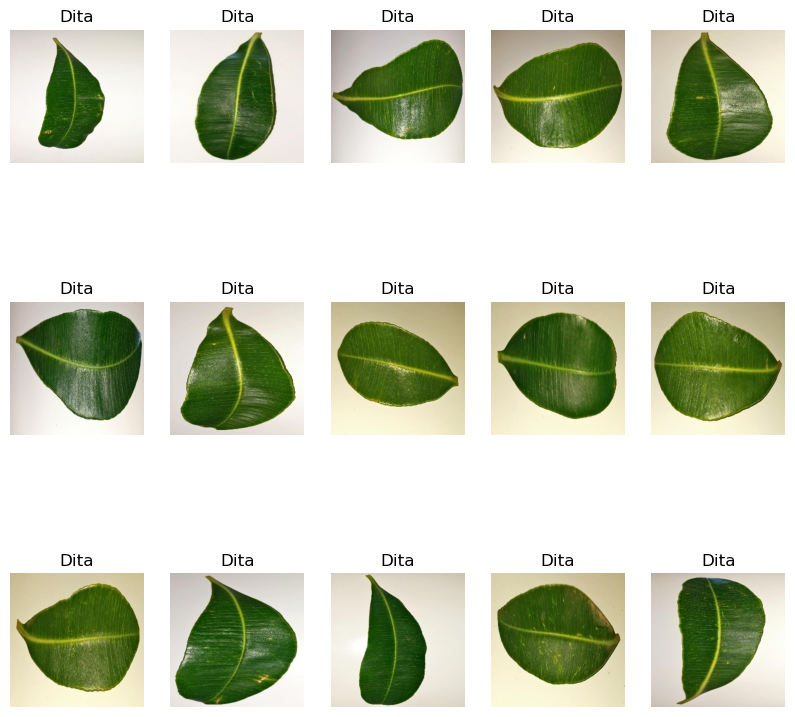

In [16]:
directory = 'Resize Images'
images, labels = load_images_from_directory(directory)

plt.figure(figsize=(10,10))
for i in range(len(images)):
    plt.subplot(3, 5, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
    plt.title(labels[i])  # Set the title of each subplot to the corresponding label
    plt.axis('off')
plt.tight_layout()
plt.show()